**1.Loading dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df_del = pd.read_csv("/content/drive/MyDrive/python project dataset/deliveries.csv")
print(df_del)


        match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman non_striker      bowler  is_super

In [3]:
df_match = pd.read_csv("/content/drive/MyDrive/python project dataset/matches.csv")
print(df_match)

        id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team2                  toss_winner t

**2. Famliarizing with data**


shape of both data set

In [ ]:
print("shape of deliveries dataset:",df_del.shape)
print("Shape of matches dataset:",df_match.shape)

shape of deliveries dataset: (179078, 21)
Shape of matches dataset: (756, 18)


**3.Exploring deliveries dataset**

In [ ]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
df_del.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
df_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df_del.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


**checking null values in deliveries dataset**

In [ ]:
df_del.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

**4.Exploring matches dataset**

In [ ]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df_match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_match.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
df_match.groupby('season').count()

,id,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
season,,,,,,,,,,,,,,,,,
2008,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,0
2009,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,0
2010,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
2011,73,73,73,73,73,73,73,73,73,72,73,73,72,73,73,73,0
2012,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,0
2013,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0
2014,60,53,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0
2015,59,59,59,59,59,59,59,59,59,57,59,59,57,59,59,59,0
2016,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0


**checking null values in matches dataset**

In [ ]:
df_match.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

**removing null values from dataset matches**

In [ ]:
df_match.dropna()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


**counting the result of match**

In [ ]:
df_match.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

**Top 10 Player of the match Winners**

In [ ]:
top_players = df_match.player_of_match.value_counts()[:10]
top_players

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

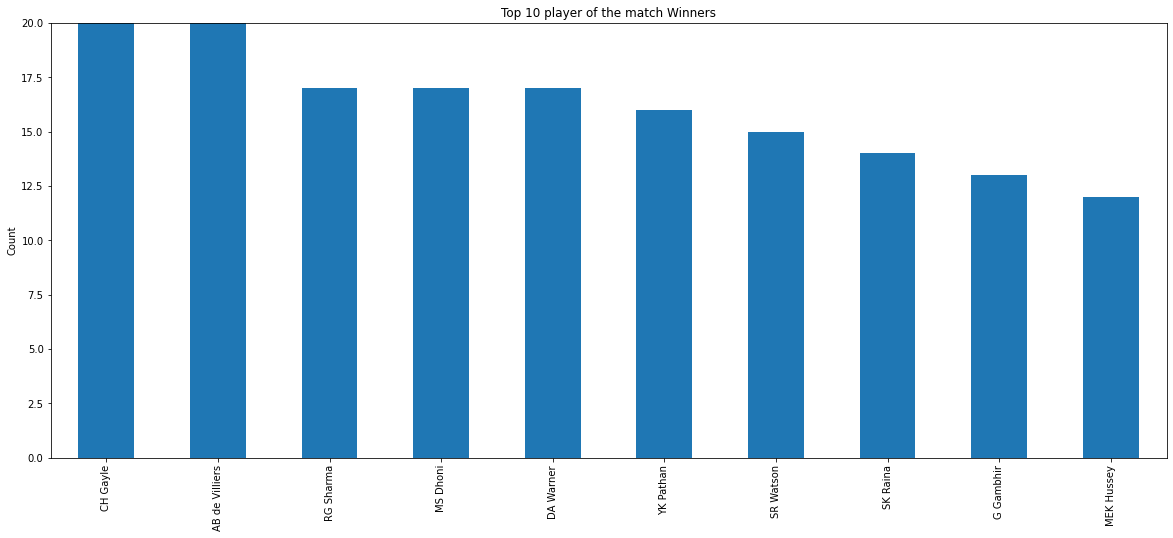

In [ ]:

fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top 10 player of the match Winners")
top_players.plot(kind="bar",figsize=(20,8))
plt.savefig("top10player.png")
plt.show()


**Matches Played by Each Team**

In [ ]:
x = df_match['team1'].value_counts()
y = df_match['team2'].value_counts()
(x+y)

Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

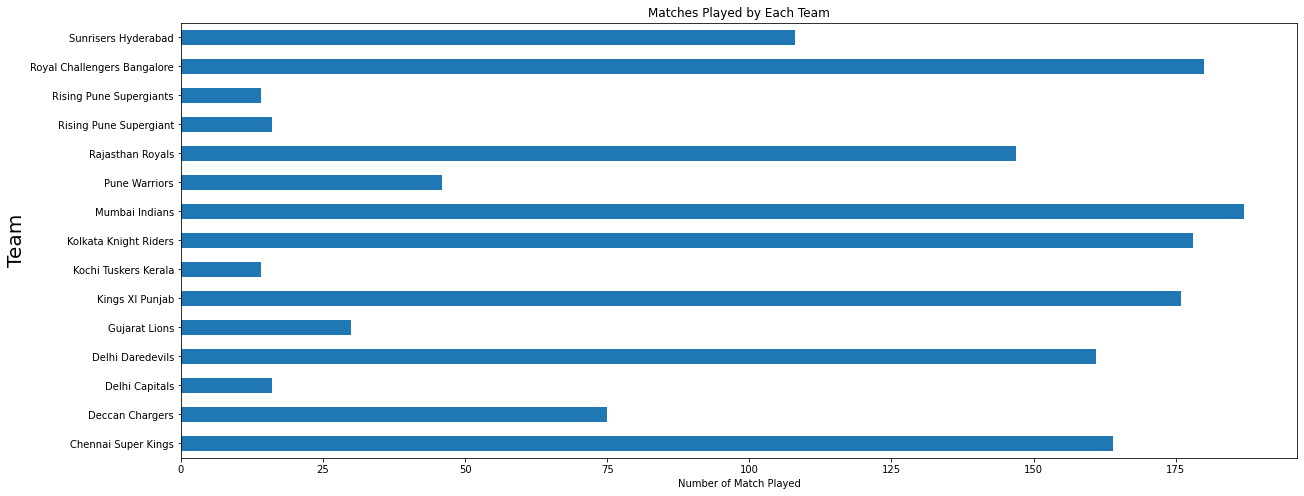

In [ ]:
(x+y).plot(kind='barh',figsize=(20,8)) 
plt.title("Matches Played by Each Team")
plt.xlabel("Number of Match Played")
plt.ylabel("Team",size=(20))
plt.savefig("Matches_Played_by_Each_Team.png")

**Top 5 man of the match**

In [ ]:
man_of_match=df_match['player_of_match'].value_counts().head()
print(man_of_match)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64


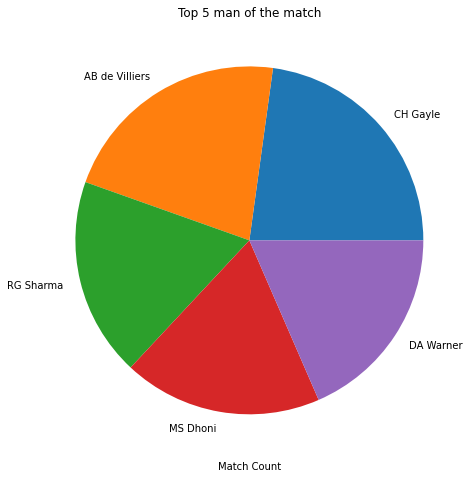

In [ ]:
man_of_match.plot(kind='pie',figsize=(20,8))
plt.title("Top 5 man of the match")
plt.xlabel("Match Count")
plt.ylabel("")
plt.show()

**Total run by each batsman**

In [5]:
tot_run=df_del.groupby('batsman')['total_runs'].sum().sort_values(ascending=False)
tot_run

batsman
SK Raina          5651
V Kohli           5616
RG Sharma         5057
DA Warner         4975
S Dhawan          4876
                  ... 
J Denly              0
V Pratap Singh       0
Abdur Razzak         0
Sunny Gupta          0
ND Doshi             0
Name: total_runs, Length: 516, dtype: int64

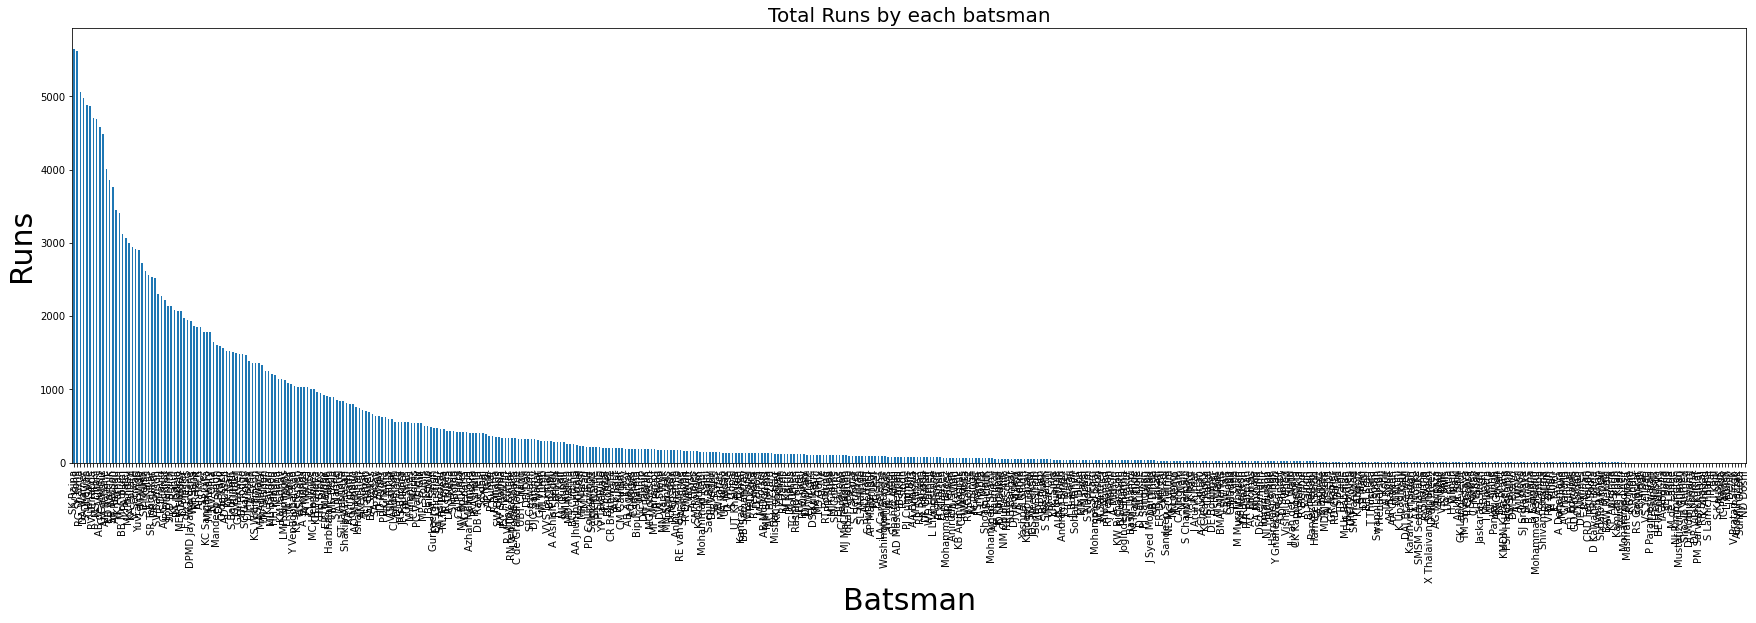

In [7]:
tot_run.plot(kind ="bar",figsize=(30,8))
plt.title('Total Runs by each batsman',size=20 )
plt.xlabel('Batsman',size=30)
plt.ylabel('Runs',size=30)
plt.show()

**Avg Run by Teams**

In [17]:
df_del[df_del['over']<6].groupby(['match_id','batting_team']).sum()['total_runs'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Sunrisers Hyderabad            39.759259
Rising Pune Supergiant         39.375000
Kolkata Knight Riders          39.179775
Delhi Daredevils               38.440994
Kings XI Punjab                38.392045
Kochi Tuskers Kerala           38.357143
Deccan Chargers                37.586667
Royal Challengers Bangalore    37.355556
Rajasthan Royals               37.157534
Chennai Super Kings            36.926829
Mumbai Indians                 36.818182
Rising Pune Supergiants        35.071429
Pune Warriors                  34.822222
Name: total_runs, dtype: float64

**Max Century by a Player**

In [18]:
runs = df_del.groupby(['non_striker','match_id'])['total_runs'].sum()
runs[runs >= 100].droplevel(level=1).groupby('non_striker').count().sort_values(ascending=False)[:10]

non_striker
S Dhawan      6
V Kohli       5
MEK Hussey    4
RG Sharma     4
G Gambhir     3
NV Ojha       3
GC Smith      3
SE Marsh      2
JH Kallis     2
KL Rahul      2
Name: total_runs, dtype: int64

**Team-wise Performance according to top 10 bolwlers**

In [ ]:
df_del.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
264,PP Chawla,4153
126,Harbhajan Singh,4050
7,A Mishra,3850
93,DJ Bravo,3733
381,UT Yadav,3640
340,SL Malinga,3511
269,R Ashwin,3391
251,P Kumar,3342
53,B Kumar,3264
282,RA Jadeja,3221


Text(0.5, 1.0, 'Team wise performance according to bowlers')

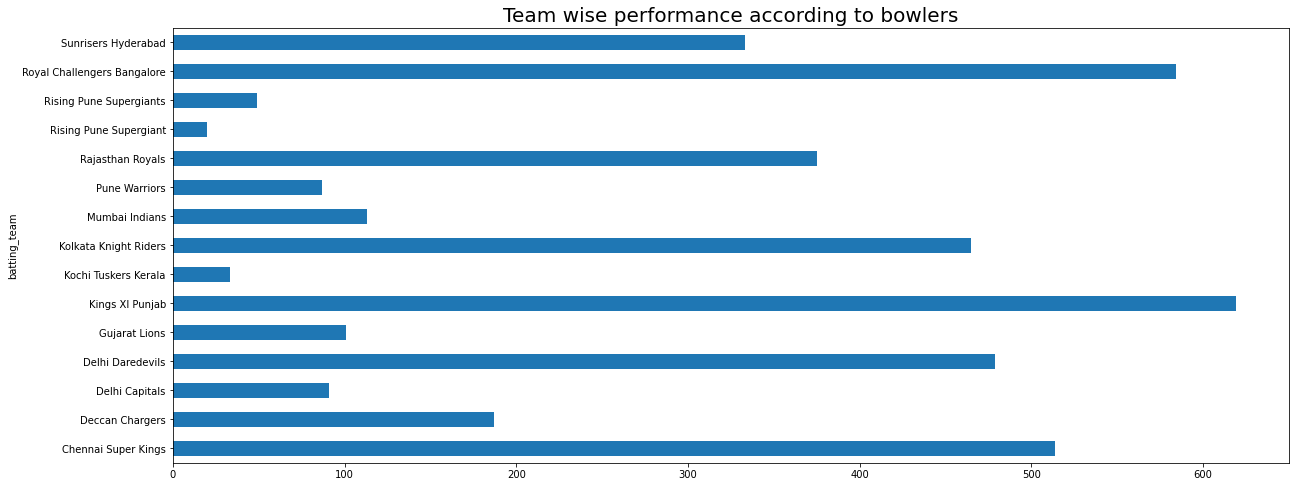

In [ ]:
a =df_del['bowler']=='Harbhajan Singh'
df_del[a].groupby('batting_team')['total_runs'].agg('sum').plot(kind='barh',figsize=(20,8))
plt.title("Team wise performance according to bowlers",size =(20))

**Who have been the winners of match**

In [ ]:
match_win = df_match.groupby('season').tail(1).sort_values('season', ascending = False)



In [ ]:
match_winners = match_win.winner.value_counts()
print(match_winners)

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64


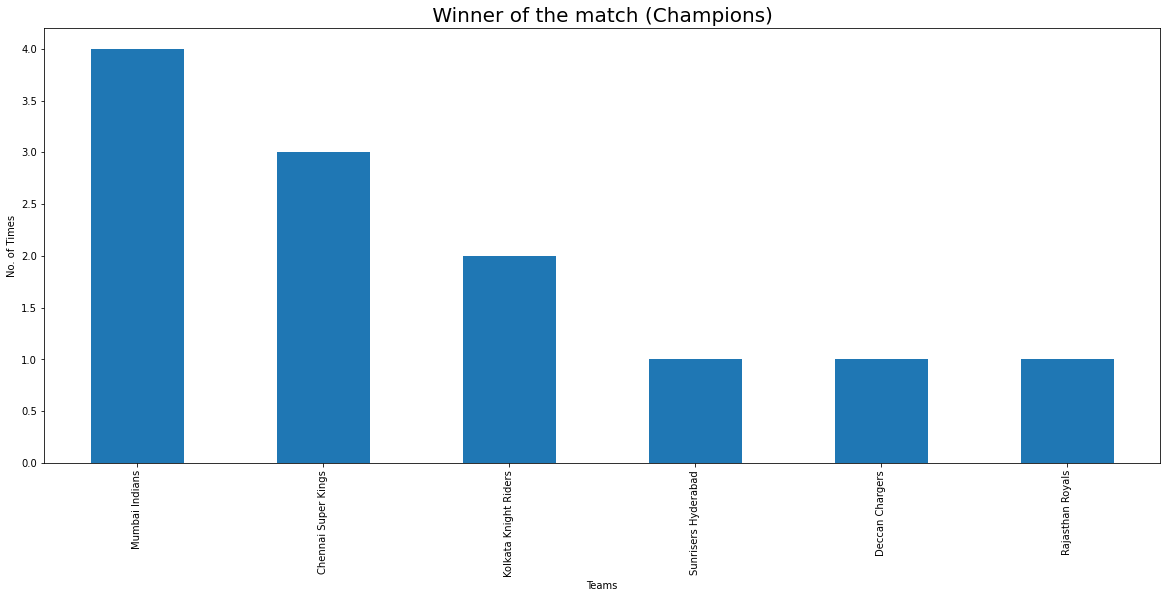

In [ ]:
plt.figure(figsize=(20, 8))
plt.xlabel('Teams')
plt.ylabel('No. of Times')
plt.title(' Winner of the match (Champions) ',size=(20))
match_winners.plot(kind="bar")

**Most No Balls by an IPL team**

In [20]:
df_del.groupby(['batting_team'])['noball_runs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    96
Chennai Super Kings            90
Mumbai Indians                 90
Kolkata Knight Riders          86
Rajasthan Royals               86
Delhi Daredevils               73
Kings XI Punjab                64
Deccan Chargers                49
Sunrisers Hyderabad            47
Pune Warriors                  24
Gujarat Lions                  17
Kochi Tuskers Kerala           11
Delhi Capitals                  8
Rising Pune Supergiants         7
Rising Pune Supergiant          1
Name: noball_runs, dtype: int64

**Toss data**

In [22]:
matches_per_season = df_match.groupby('season').id.count()

In [28]:
toss_decision_per = df_match.groupby('season').toss_decision.value_counts().sort_index() / matches_per_season * 100
toss_decision_per.index
toss_decision_per.unstack()

toss_decision,bat,field
season,,
2008,44.827586,55.172414
2009,61.403509,38.596491
2010,65.000000,35.000000
2011,34.246575,65.753425
2012,50.000000,50.000000
2013,59.210526,40.789474
2014,31.666667,68.333333
2015,42.372881,57.627119
2016,18.333333,81.666667


**Teams who had won the toss and won the match**

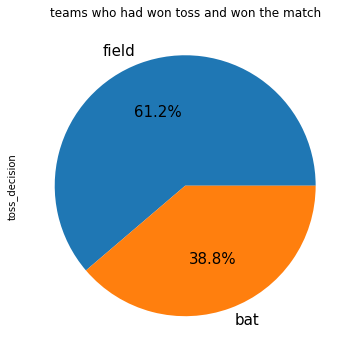

In [29]:
df_match.toss_decision.value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(12,6),title='teams who had won toss and won the match',fontsize=15)

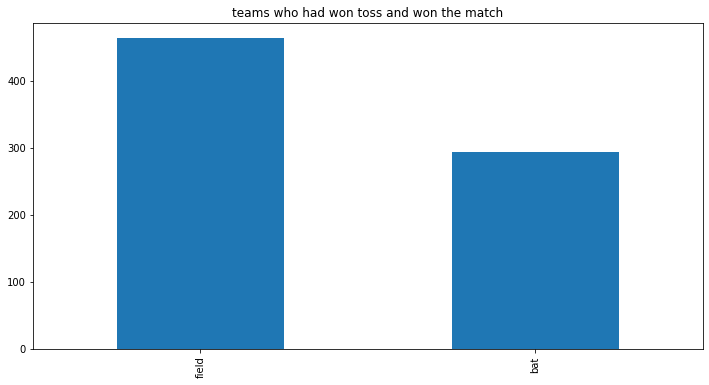

In [37]:
df_match.toss_decision.value_counts().plot(kind='bar',figsize=(12,6),title='teams who had won toss and won the match',fontsize=10)

**toss winner per team**

In [ ]:
toss=df_match.groupby('toss_winner').toss_winner.value_counts()
toss

toss_winner                  toss_winner                
Chennai Super Kings          Chennai Super Kings            89
Deccan Chargers              Deccan Chargers                43
Delhi Capitals               Delhi Capitals                 10
Delhi Daredevils             Delhi Daredevils               80
Gujarat Lions                Gujarat Lions                  15
Kings XI Punjab              Kings XI Punjab                81
Kochi Tuskers Kerala         Kochi Tuskers Kerala            8
Kolkata Knight Riders        Kolkata Knight Riders          92
Mumbai Indians               Mumbai Indians                 98
Pune Warriors                Pune Warriors                  20
Rajasthan Royals             Rajasthan Royals               80
Rising Pune Supergiant       Rising Pune Supergiant          6
Rising Pune Supergiants      Rising Pune Supergiants         7
Royal Challengers Bangalore  Royal Challengers Bangalore    81
Sunrisers Hyderabad          Sunrisers Hyderabad            4

Text(0, 0.5, 'Teams')

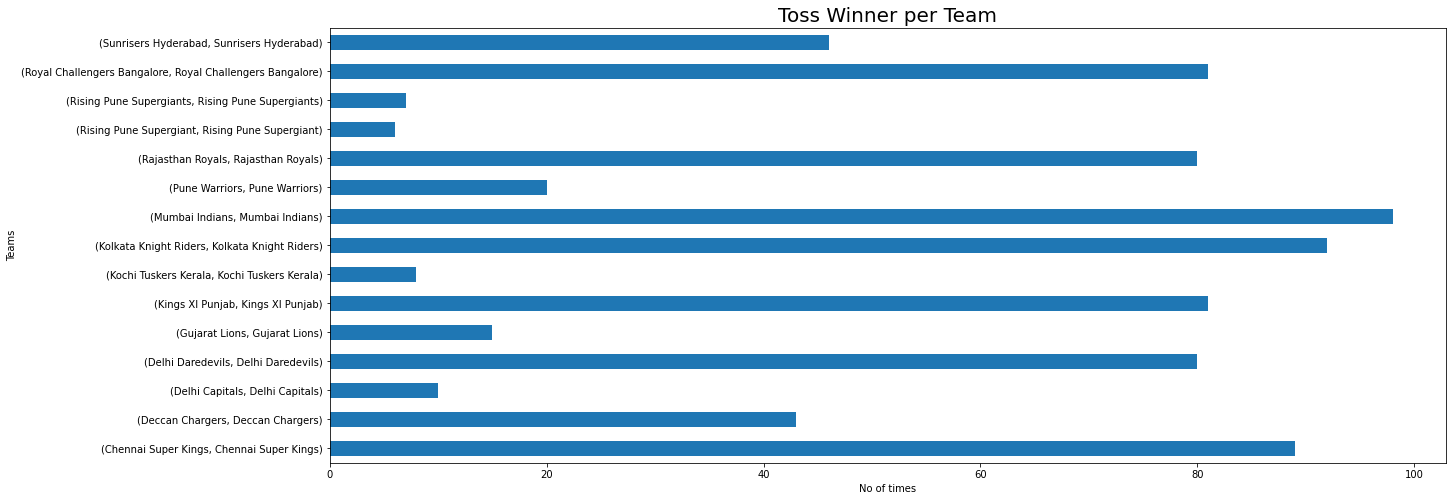

In [ ]:

toss.plot(kind="barh",figsize=(20,8))
plt.title("Toss Winner per Team",size=(20))
plt.xlabel('No of times')
plt.ylabel('Teams')

**Which team has won the maximum number  of tosses [season wise]**   

In [21]:
toss_season=df_match.groupby('season').toss_winner.value_counts()
toss_season

season  toss_winner                
2008    Rajasthan Royals               11
        Deccan Chargers                 9
        Kings XI Punjab                 8
        Mumbai Indians                  8
        Delhi Daredevils                6
                                       ..
2019    Mumbai Indians                  8
        Kings XI Punjab                 6
        Kolkata Knight Riders           5
        Royal Challengers Bangalore     4
        Sunrisers Hyderabad             4
Name: toss_winner, Length: 100, dtype: int64

Text(0, 0.5, 'No. of Matches')

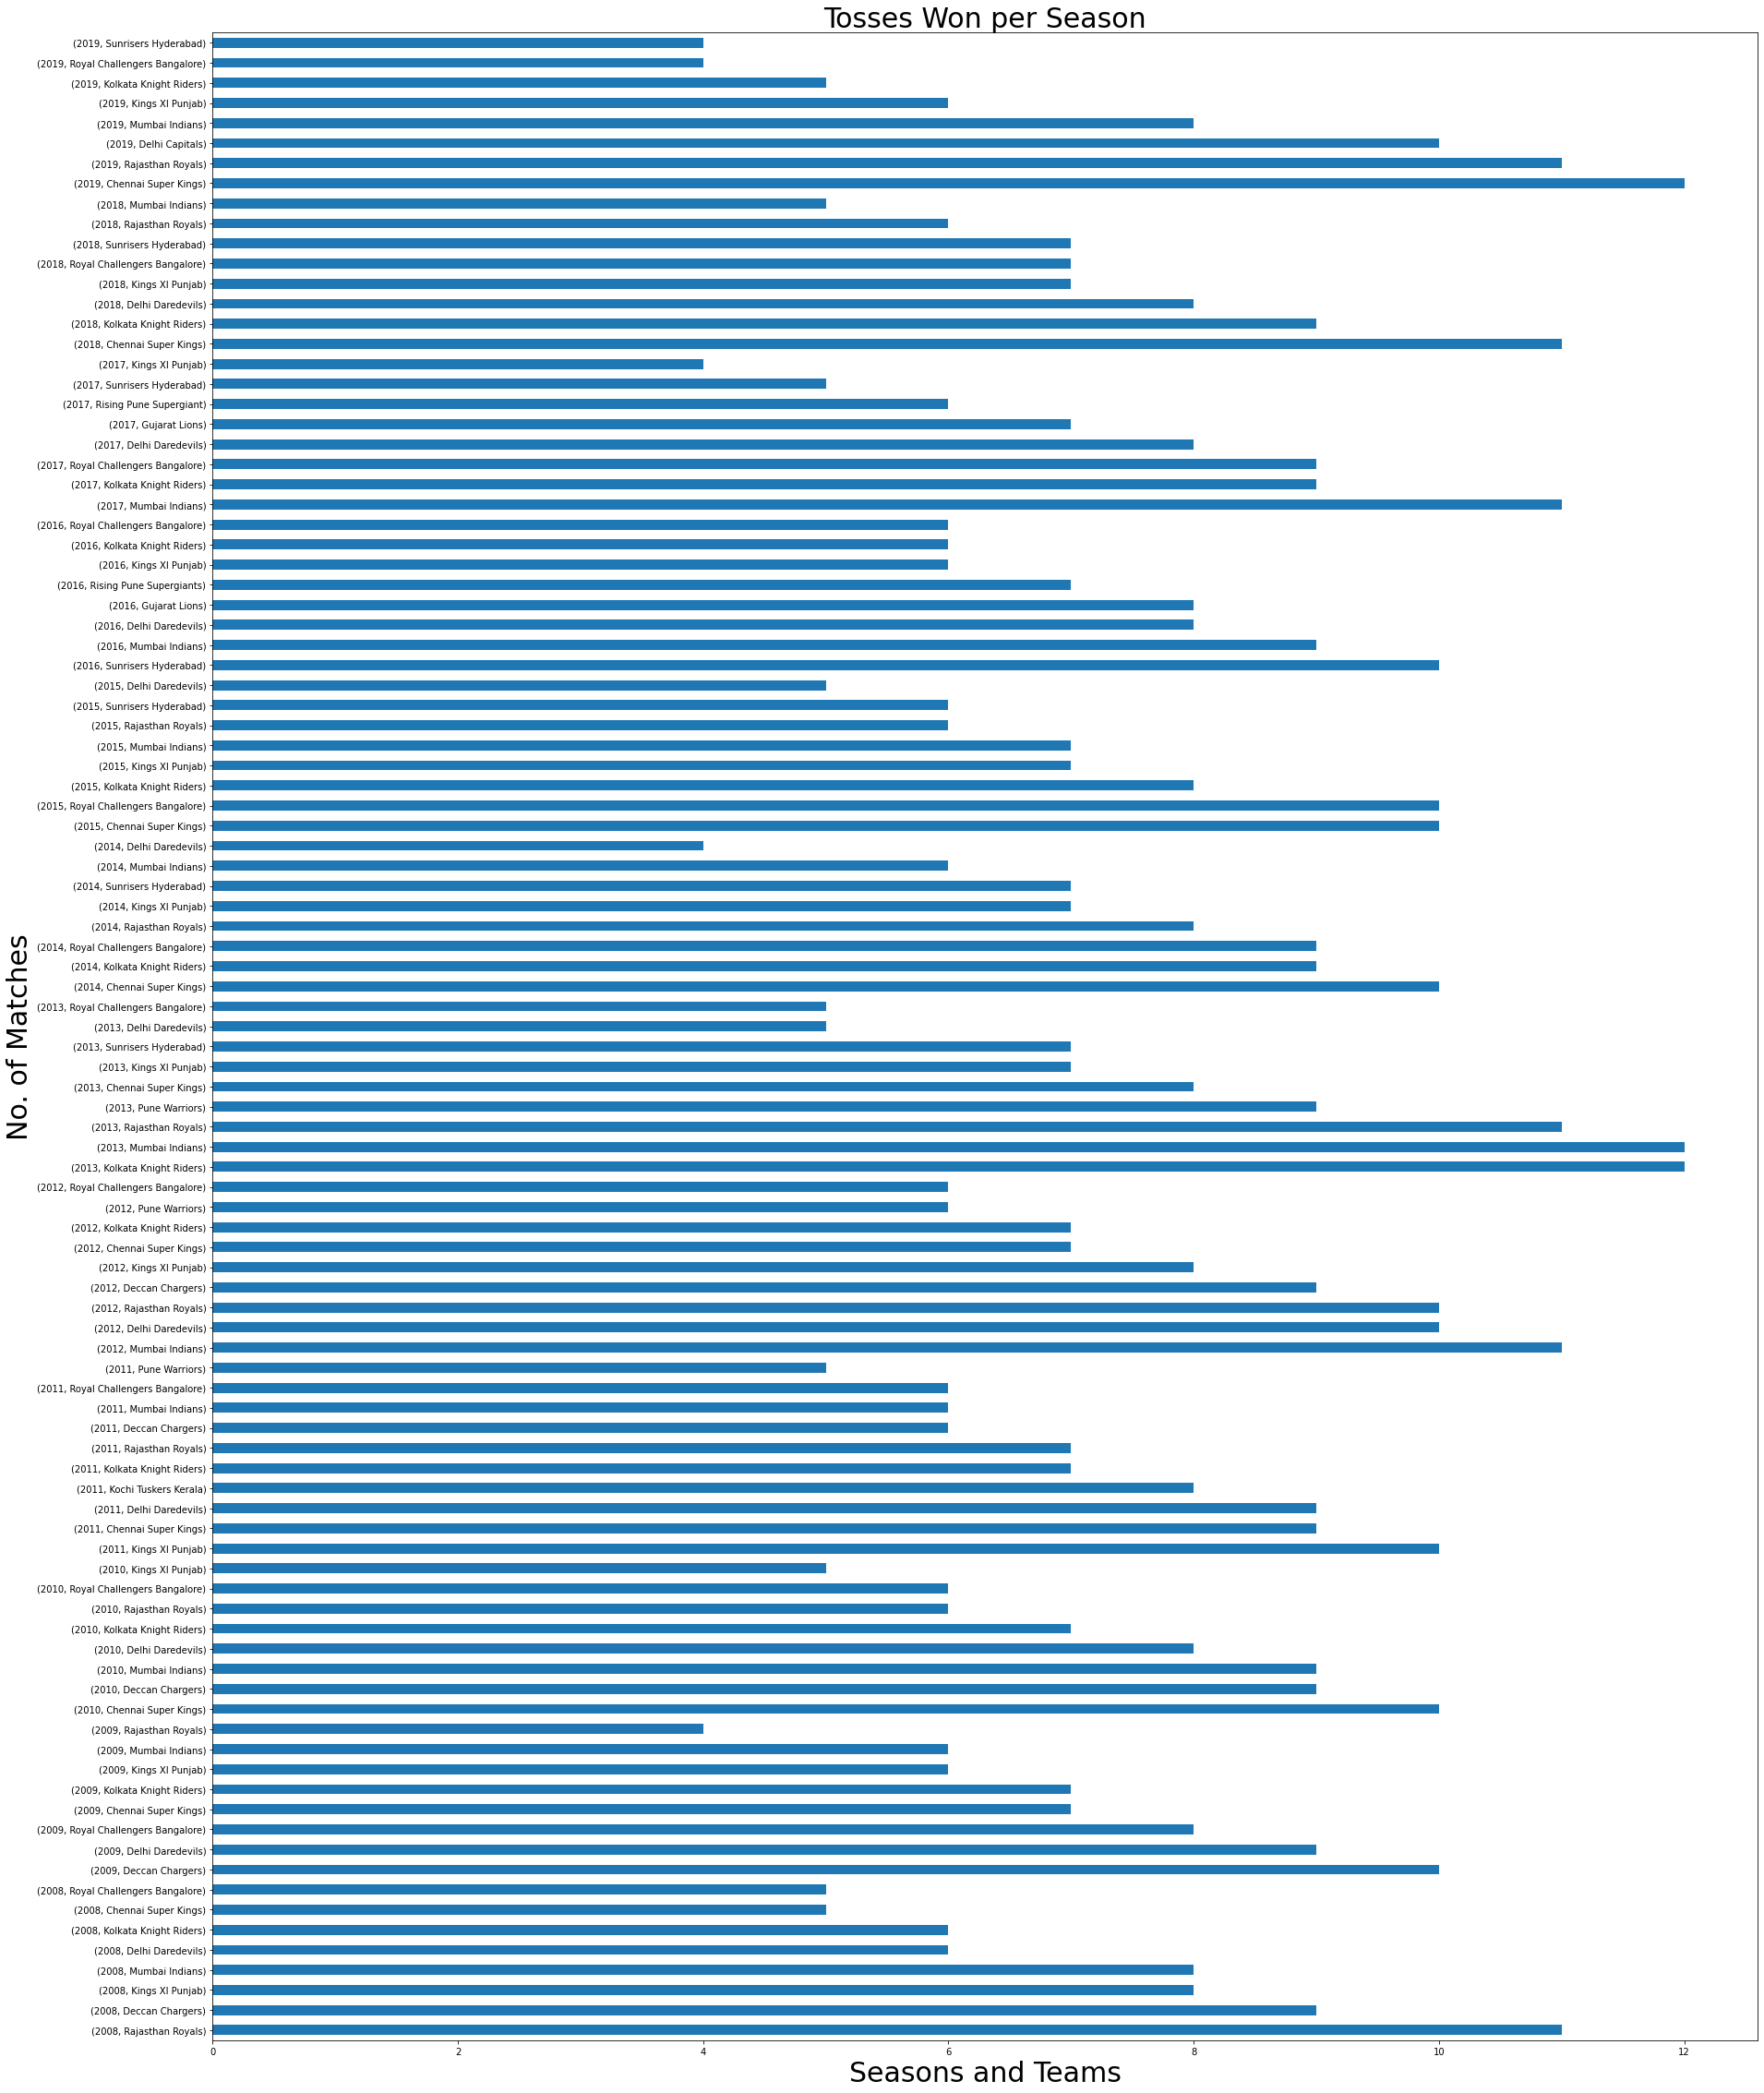

In [ ]:

toss_season.plot(kind ='barh', figsize = (30,40))
plt.title('Tosses Won per Season',size = 30)
plt.xlabel('Seasons and Teams',size = 30)
plt.ylabel('No. of Matches',size = 30)



**Matches per seasons**

In [ ]:
matches_per_season = df_match.groupby('season').id.count()
matches_per_season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

Text(0, 0.5, 'No. of Matches')

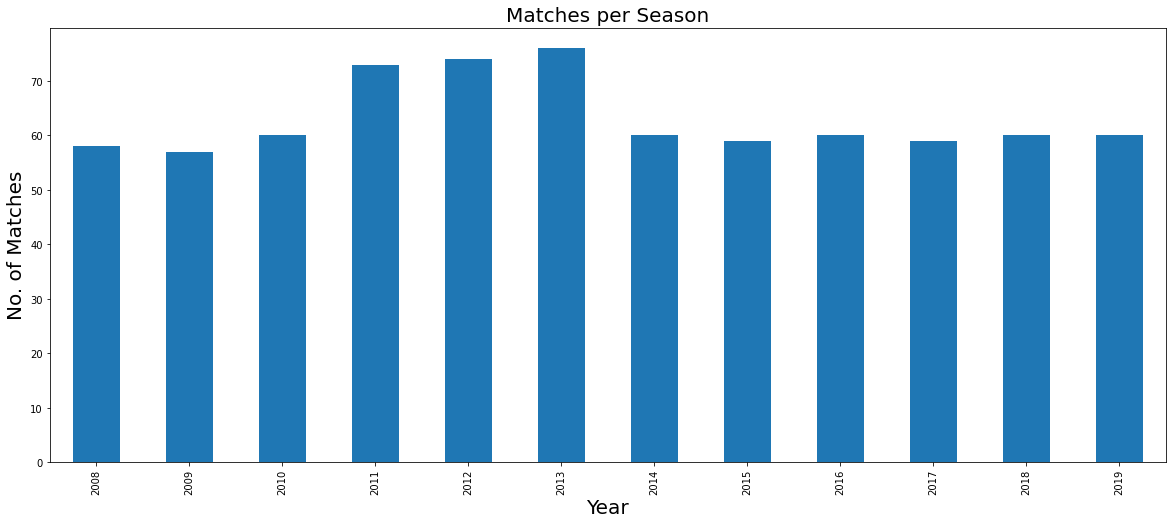

In [ ]:
matches_per_season.plot(kind = "bar",figsize=(20,8))
plt.title('Matches per Season',size = 20)
plt.xlabel('Year',size = 20)
plt.ylabel('No. of Matches',size = 20)


**Number of matches playes in each stadium**

In [ ]:
df_match.venue.value_counts().sort_values()



ACA-VDCA Stadium                                         2
OUTsurance Oval                                          2
Vidarbha Cricket Association Stadium, Jamtha             3
De Beers Diamond Oval                                    3
Buffalo Park                                             3
Green Park                                               4
Nehru Stadium                                            5
Sharjah Cricket Stadium                                  6
Shaheed Veer Narayan Singh International Stadium         6
Feroz Shah Kotla Ground                                  7
Barabati Stadium                                         7
M. Chinnaswamy Stadium                                   7
St George's Park                                         7
Sheikh Zayed Stadium                                     7
JSCA International Stadium Complex                       7
IS Bindra Stadium                                        7
Newlands                                                

In [68]:
b=df_del.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by='player_dismissed',ascending=False)
b

,total_runs,ball,player_dismissed
bowler,,,
SL Malinga,3511,2974,188
DJ Bravo,3733,2711,168
A Mishra,3850,3172,165
Harbhajan Singh,4050,3451,161
PP Chawla,4153,3157,156
...,...,...,...
BJ Rohrer,12,7,0
RA Tripathi,12,6,0
RA Shaikh,11,6,0
